# Analysis of SQuAD 2.0 dataset

In [1]:
from question_answering.paths import extractive_qa_paths
from question_answering.utils import core_qa_utils
from transformers import AutoTokenizer

C:\Users\Karol\miniconda3\envs\question_answering\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
raw_train_dataset, raw_test_dataset = core_qa_utils.load_datasets_from_json(
    dataset_path=extractive_qa_paths.squad2_dataset_dir,
    filenames=["original_train.json", "original_test.json"],
)

In [3]:
train_dataset = raw_train_dataset.select(range(115000))
val_dataset = raw_train_dataset.select(range(115000, 130319))
test_dataset = raw_test_dataset

In [8]:
test_dataset

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers', 'answer_text', 'answer_start'],
    num_rows: 11873
})

## Maximum number of tokens in any sample across dataset

In [4]:
def tokenize_sample(sample, tokenizer, max_tokens=None, padding=False):
    question = sample["question"].strip()
    context = sample["context"].strip()

    return tokenizer(question, context, max_length=max_tokens, padding=padding)

#### BERT uncased

In [5]:
bert_uncased_tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

In [6]:
tokenized_train_dataset = train_dataset.map(
    lambda row: tokenize_sample(row, bert_uncased_tokenizer)
)
tokenized_val_dataset = val_dataset.map(
    lambda row: tokenize_sample(row, bert_uncased_tokenizer)
)
tokenized_test_dataset = test_dataset.map(
    lambda row: tokenize_sample(row, bert_uncased_tokenizer)
)

In [7]:
max_bert_uncased_train_tokens = len(max(tokenized_train_dataset["input_ids"], key=len))
max_bert_uncased_val_tokens = len(max(tokenized_val_dataset["input_ids"], key=len))
max_bert_uncased_test_tokens = len(max(tokenized_test_dataset["input_ids"], key=len))
max_bert_uncased_tokens = max(
    max_bert_uncased_train_tokens,
    max_bert_uncased_val_tokens,
    max_bert_uncased_test_tokens,
)

print(
    f"Max number of tokens in tokenized train dataset: {max_bert_uncased_train_tokens}"
)
print(f"Max number of tokens in tokenized val dataset: {max_bert_uncased_val_tokens}")
print(f"Max number of tokens in tokenized test dataset: {max_bert_uncased_test_tokens}")
print(f"Max number of tokens overall: {max_bert_uncased_tokens}")

#### BERT cased

In [8]:
bert_cased_tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")

In [9]:
tokenized_train_dataset = train_dataset.map(
    lambda row: tokenize_sample(row, bert_cased_tokenizer)
)
tokenized_val_dataset = val_dataset.map(
    lambda row: tokenize_sample(row, bert_cased_tokenizer)
)
tokenized_test_dataset = test_dataset.map(
    lambda row: tokenize_sample(row, bert_cased_tokenizer)
)

In [10]:
max_bert_cased_train_tokens = len(max(tokenized_train_dataset["input_ids"], key=len))
max_bert_cased_val_tokens = len(max(tokenized_val_dataset["input_ids"], key=len))
max_bert_cased_test_tokens = len(max(tokenized_test_dataset["input_ids"], key=len))
max_bert_cased_tokens = max(
    max_bert_cased_train_tokens, max_bert_cased_val_tokens, max_bert_cased_test_tokens
)

print(f"Max number of tokens in tokenized train dataset: {max_bert_cased_train_tokens}")
print(f"Max number of tokens in tokenized val dataset: {max_bert_cased_val_tokens}")
print(f"Max number of tokens in tokenized test dataset: {max_bert_cased_test_tokens}")
print(f"Max number of tokens overall: {max_bert_cased_tokens}")

#### ALBERT cased

In [11]:
albert_cased_tokenizer = AutoTokenizer.from_pretrained("albert/albert-base-v2")

In [12]:
tokenized_train_dataset = train_dataset.map(
    lambda row: tokenize_sample(row, albert_cased_tokenizer)
)
tokenized_val_dataset = val_dataset.map(
    lambda row: tokenize_sample(row, albert_cased_tokenizer)
)
tokenized_test_dataset = test_dataset.map(
    lambda row: tokenize_sample(row, albert_cased_tokenizer)
)

In [13]:
max_albert_cased_train_tokens = len(max(tokenized_train_dataset["input_ids"], key=len))
max_albert_cased_val_tokens = len(max(tokenized_val_dataset["input_ids"], key=len))
max_albert_cased_test_tokens = len(max(tokenized_test_dataset["input_ids"], key=len))
max_albert_cased_tokens = max(
    max_albert_cased_train_tokens,
    max_albert_cased_val_tokens,
    max_albert_cased_test_tokens,
)

print(
    f"Max number of tokens in tokenized train dataset: {max_albert_cased_train_tokens}"
)
print(f"Max number of tokens in tokenized val dataset: {max_albert_cased_val_tokens}")
print(f"Max number of tokens in tokenized test dataset: {max_albert_cased_test_tokens}")
print(f"Max number of tokens overall: {max_albert_cased_tokens}")

## Data samples structure

#### Train sample with answer

In [27]:
sample_with_answer = val_dataset[0]

In [30]:
sample_with_answer

#### Train sample without answer

In [31]:
sample_without_answer = val_dataset[5]

In [32]:
sample_without_answer

#### Test sample with answer

In [67]:
test_sample_with_answer = test_dataset[1]

In [68]:
test_sample_with_answer

#### Test sample without answer

In [69]:
test_sample_without_answer = test_dataset[0]

In [70]:
test_sample_without_answer

## Number of no answer samples

In [10]:
whole_dataset_answers = train_dataset['answer_text'] + val_dataset['answer_text'] + test_dataset['answer_text']

In [11]:
len(whole_dataset_answers)

142192

In [7]:
count = 0
for answer in whole_dataset_answers:
    if len(answer) == 0:
        count = count + 1

In [8]:
count

49443

## Sentence lengths histograms

In [4]:
contexts = train_dataset['context'] + val_dataset['context'] + test_dataset['context']

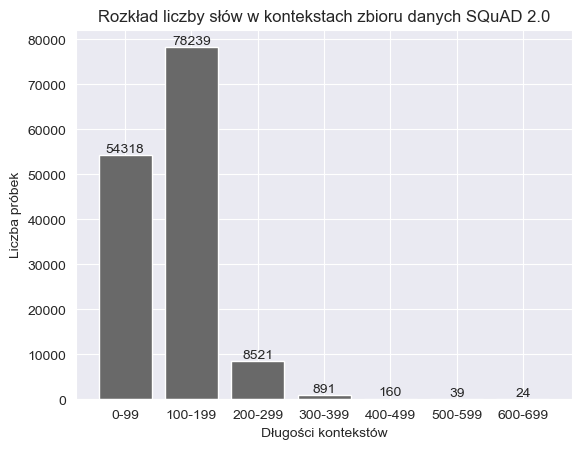

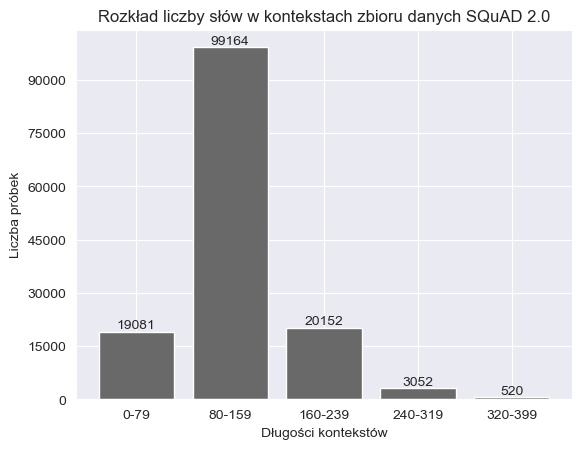

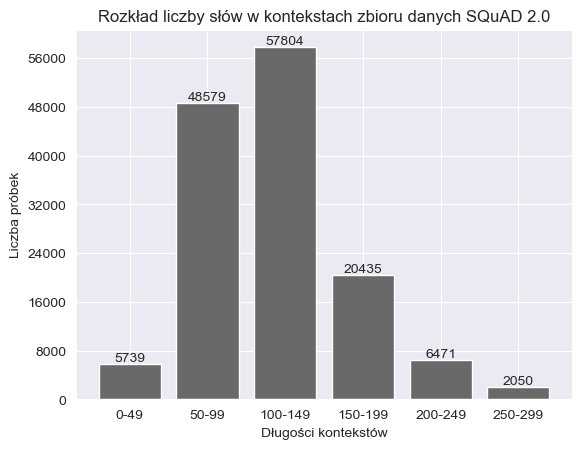

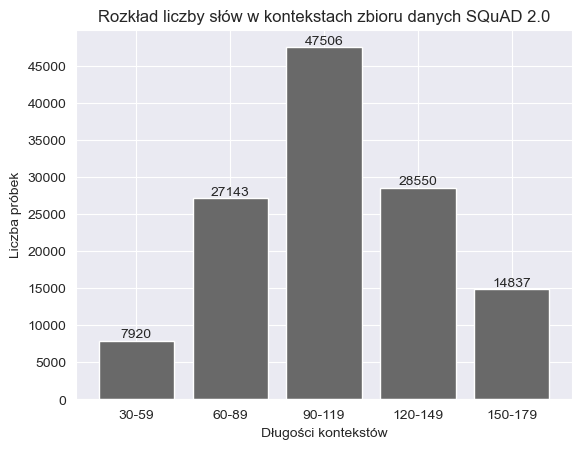

In [5]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=contexts,
    figure_path=extractive_qa_paths.general_figures_dir
                / "squad2_context_sentence_lengths_histogram_0_700_100.png",
    figure_title="Rozkład liczby słów w kontekstach zbioru danych SQuAD 2.0",
    min_threshold=0,
    max_threshold=700,
    divider=100,
    x_label="Długości kontekstów",
    y_label="Liczba próbek"
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=contexts,
    figure_path=extractive_qa_paths.general_figures_dir
                / "squad2_context_sentence_lengths_histogram_0_400_80.png",
    figure_title="Rozkład liczby słów w kontekstach zbioru danych SQuAD 2.0",
    min_threshold=0,
    max_threshold=400,
    divider=80,
    x_label="Długości kontekstów",
    y_label="Liczba próbek"
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=contexts,
    figure_path=extractive_qa_paths.general_figures_dir
                / "squad2_context_sentence_lengths_histogram_0_300_50.png",
    figure_title="Rozkład liczby słów w kontekstach zbioru danych SQuAD 2.0",
    min_threshold=0,
    max_threshold=300,
    divider=50,
    x_label="Długości kontekstów",
    y_label="Liczba próbek"
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=contexts,
    figure_path=extractive_qa_paths.general_figures_dir
                / "squad2_context_sentence_lengths_histogram_30_180_30.png",
    figure_title="Rozkład liczby słów w kontekstach zbioru danych SQuAD 2.0",
    min_threshold=30,
    max_threshold=180,
    divider=30,
    x_label="Długości kontekstów",
    y_label="Liczba próbek"
)

In [6]:
questions = train_dataset['question'] + val_dataset['question'] + test_dataset['question']

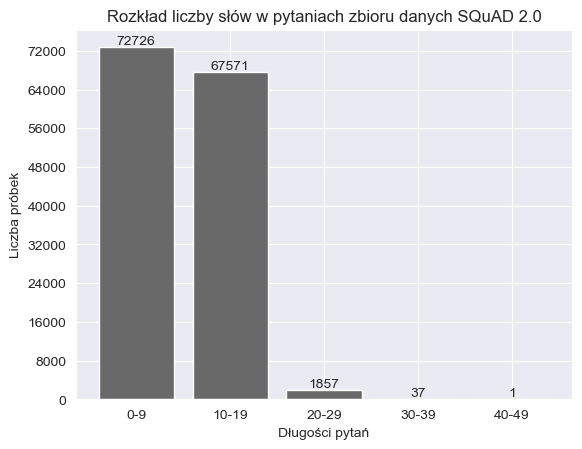

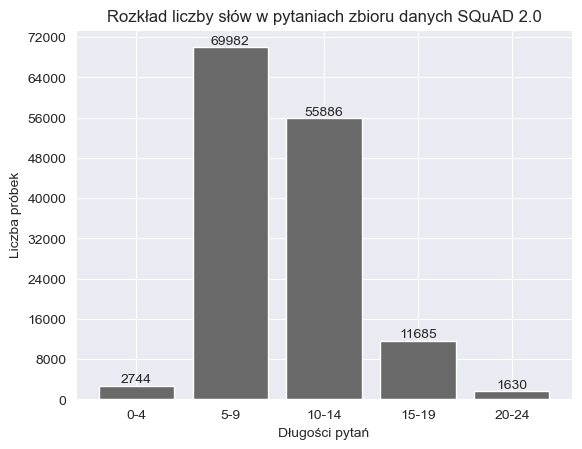

In [7]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=questions,
    figure_path=extractive_qa_paths.general_figures_dir
                / "squad2_question_sentence_lengths_histogram_0_50_10.png",
    figure_title="Rozkład liczby słów w pytaniach zbioru danych SQuAD 2.0",
    min_threshold=0,
    max_threshold=50,
    divider=10,
    x_label="Długości pytań",
    y_label="Liczba próbek"
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=questions,
    figure_path=extractive_qa_paths.general_figures_dir
                / "squad2_question_sentence_lengths_histogram_0_25_5.png",
    figure_title="Rozkład liczby słów w pytaniach zbioru danych SQuAD 2.0",
    min_threshold=0,
    max_threshold=25,
    divider=5,
    x_label="Długości pytań",
    y_label="Liczba próbek"
)